In [2]:
import sys
sys.path.insert(0, "..")

In [3]:
import numpy as np
from matplotlib import pyplot as plt

from module.base.network import Network
from module.simulation.meanfield import MeanField
import module.components.CONST as CONST

## Single Electron Transistor

We calculate the output current for a one-nanoparticle network under varied input voltages.

In [43]:
net = Network(1,1,1,[[0,0,0],[0,0,0]])
mf = MeanField(net)

In [46]:
n = 100
U_input = np.linspace(-0.05, 0.05, n)
I_out = np.zeros(n)

for i in range(n):

    net.set_voltage_config([U_input[i], 0], 0.1)
    macrostate = np.zeros(1)
    dt = 0.1
    for _ in range(50):
        macrostate = macrostate + mf.calc_total_currents(macrostate) * dt
    
    I_out[i] = mf.calc_expected_electrode_current(macrostate, 1)

Text(0.5, 1.0, 'SET für V_Gate = 0.1V')

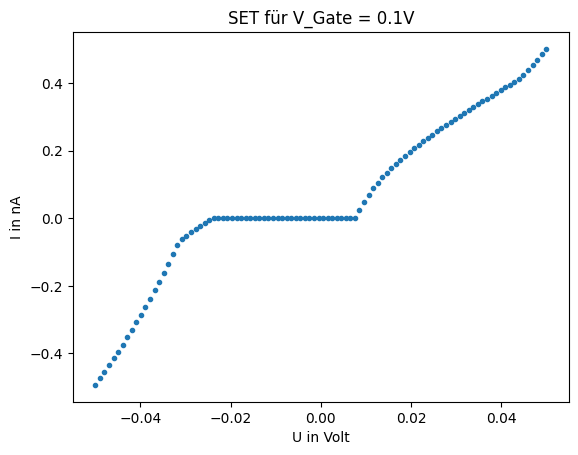

In [48]:
plt.scatter(U_input, -CONST.electron_charge*I_out, marker = ".")
plt.xlabel('U in Volt')
plt.ylabel('I in nA')
plt.title("SET für V_Gate = 0.1V")